# **Note:** *Better Training of Deep Learning models* requires large amount of data.


## ***Importing the main libraries used***

In [ ]:
import tensorflow as tf                     # tensorflow library handles the operations related to datasets

from keras import optimizers                  # importing optimizers for better results of the model

from keras.utils import load_img, img_to_array     # importing the libraries for loading and processing the images

from keras.models import Sequential            # Sequentail model is used for ANN layers

from keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D   # importing other CNN, Maxpooling and fully connected layers

from keras.preprocessing.image import ImageDataGenerator                  # for generating or saving images to test and train folders

from keras.callbacks import EarlyStopping          # to stop training the model when overfitting starts

import cv2                                       # for image processing

from keras.preprocessing import image

import numpy as np                             # n-dimentional arrays

import matplotlib.pyplot as plt   # for visualization

import os                    # for connection with Google Drive or with other operating system

import pandas as pd      # for dataframes


## ***Implenting EarlyStopping module to stop training the model when overfitting occurs***

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback=EarlyStopping(
    monitor="val_loss",  # monitoring parameter
    min_delta=0.00001,   # minimum change in val_loss value required between epochs
patience = 10,           # check the overfitting scenario, and wait for 10 epochs
verbose=1,               # debug mode visibility
mode="auto",
baseline=None,
restore_best_weights=False
)

# ***Getting the Data of Images from Google Drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ***Giving the path of Test and Train Folders from the Drive***

In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/Fleas/train'
test_path = '/content/drive/MyDrive/Colab Notebooks/Fleas/test'


## ***Train-Test data is Splitted in the ratio: 75%-25%***
### means **75%** data is in Training Folder for both classes (Cat Flea/Dog Flea)
### and **25%** data is in Testing Folder for both classes (Cat Flea/Dog Flea)

## **Getting the data from the Train-Test folders** and Saving in the variables (train_generator and test_generator)

In [ ]:
image_shape = (400,450,3)   # input size is kept low due to memory
N_CLASSES = 2                # 2 classes (cat flea/ dog flea)
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32', rescale= 1./255.) # Image data is generated and normalized

# generating data from directory according to train_datagen variable

train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size = BATCH_SIZE,
                                                   target_size = (400,450),
                                                    class_mode = 'binary' # because of 2 classes
                                                    )


# generating Test data

test_datagen = ImageDataGenerator(dtype='float32', rescale = 1.0/255.0)
test_generator = test_datagen.flow_from_directory(test_path,
                                                     batch_size = BATCH_SIZE,
                                                   target_size = (400,450),
                                                   class_mode = 'binary')

# checking the train data image shape
print(train_generator.image_shape)

print(train_generator)


Found 335 images belonging to 2 classes.
Found 112 images belonging to 2 classes.
Found 112 images belonging to 2 classes.
(400, 450, 3)


## **checking the train data image shape**

In [ ]:
train_generator.image_shape

(400, 450, 3)

## **checking the train data number of classes**

In [ ]:
train_generator.num_classes

2

## **checking the train data indices where the classes are stored**

In [ ]:
train_generator.class_indices # Cat Flea class is stored at index 0 and the Dog Flea is stored at index 1 and its a dictionary

{'Cat Flea': 0, 'Dog Flea': 1}

## ***Visualizing the Test Data***

['Cat Flea', 'Dog Flea']


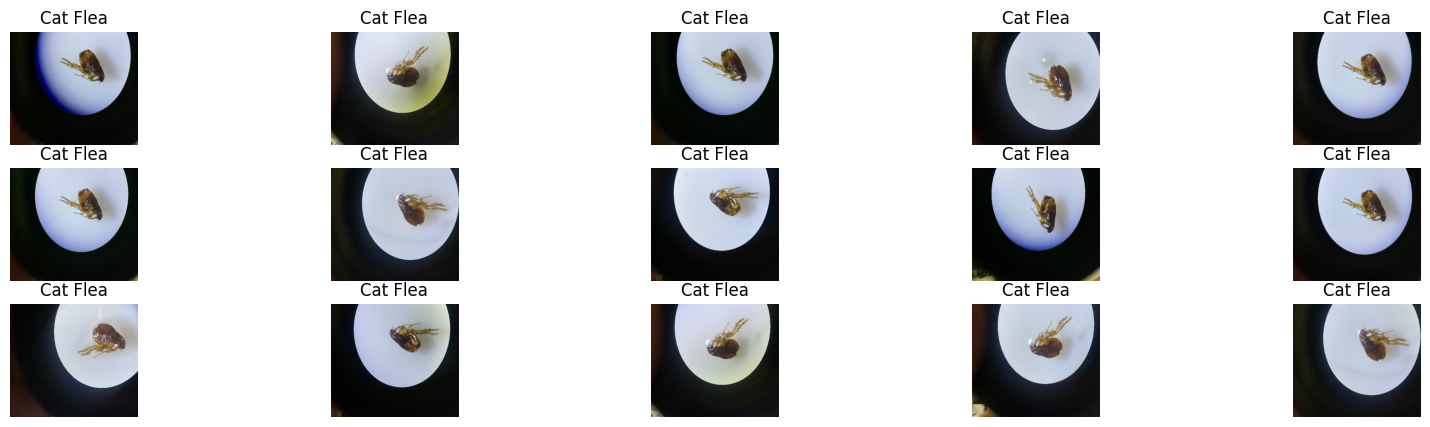

In [ ]:
class_names = list(test_generator.class_indices.keys()) # printing the list of keys of dictionary for output classes
print(class_names)

fig = plt.figure(figsize=(20,5))

image_batch,label_batch = test_generator[1]

for i in range(15):
    ax = fig.add_subplot(3,5,i+1,xticks = [], yticks = [])
    ax.imshow(image_batch[i])
    plt.axis('off')
    plt.title(class_names[np.argmax(label_batch[i])])  # for showing the images along with the labels

# ***Neural Network Layers (3 CNN layers and 3 ANN layers)***

In [ ]:

model = Sequential()
model.add(Conv2D(input_shape = (400,450, 3), kernel_size=(3, 3), strides=(2, 2), filters=32))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Conv2D(kernel_size=(3, 3), strides=(2, 2), filters=64))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))
model.add(Conv2D(kernel_size=(3, 3), strides=(2, 2), filters=128))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(1, 1)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))

 ### Dropout is used in ANN layers to reduce overfitting

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1, activation = 'sigmoid'))


## **Compiling the model** with **loss= binary_crossentropy** (because of 2 output classes) and **optimizer = adam** (for best result)

In [ ]:

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.build(input_shape=(400,450, 3))

## ***Checking the Trainable parameters or summary of model***

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 199, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 198, 223, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 98, 111, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 97, 110, 64)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 54, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 47, 53, 128)      0

## ***Running the model for 25 epochs and validation data = test data in this case***

In [ ]:
history = model.fit(
     train_generator,
            epochs= 50,
            verbose=1,
            validation_data=test_generator,
            callbacks=callback # Early stopping module
            )

Epoch 1/50
11/11 [==============================] - 121s 10s/step - loss: 2.8267 - accuracy: 0.5463 - val_loss: 1.0456 - val_accuracy: 0.5000
Epoch 2/50
11/11 [==============================] - 78s 7s/step - loss: 1.2070 - accuracy: 0.5672 - val_loss: 0.8977 - val_accuracy: 0.4911
Epoch 3/50
11/11 [==============================] - 78s 7s/step - loss: 0.5438 - accuracy: 0.7373 - val_loss: 0.9289 - val_accuracy: 0.3661
Epoch 4/50
11/11 [==============================] - 76s 7s/step - loss: 0.4803 - accuracy: 0.7761 - val_loss: 1.0612 - val_accuracy: 0.4643
Epoch 5/50
11/11 [==============================] - 77s 7s/step - loss: 0.3883 - accuracy: 0.8239 - val_loss: 0.6454 - val_accuracy: 0.7679
Epoch 6/50
11/11 [==============================] - 78s 7s/step - loss: 0.3058 - accuracy: 0.8597 - val_loss: 0.7613 - val_accuracy: 0.5893
Epoch 7/50
11/11 [==============================] - 76s 7s/step - loss: 0.2129 - accuracy: 0.9134 - val_loss: 1.1838 - val_accuracy: 0.6429
Epoch 8/50
11/11 [

# ***Model Accuracy and Model Loss Graph***

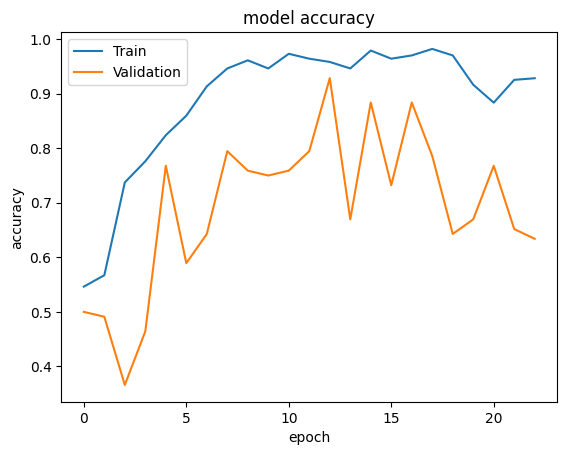

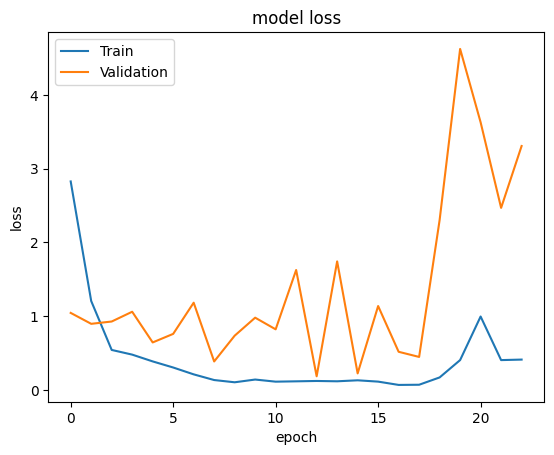

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# ***Prediction according to the above trained model***

In [ ]:
# Dog Flea Image
test_image = load_img('/content/drive/MyDrive/Colab Notebooks/Fleas/dog_flea.jpg', target_size=(400,450))

test_image = np.array(test_image)
test_image = test_image/ 255.0  # normalize the image
test_image = test_image.reshape(1, 400, 450, 3) # reshape for prediction
#plt.imshow(test_image)

pred = model.predict(test_image)
if pred[0] > 0.5:
    label = 'Dog Flea'
else:
    label = 'Cat Flea'
print(label)

1/1 [==============================] - 0s 95ms/step
Dog Flea


In [ ]:
# Taking image from testing data of Cat flea

test_image = load_img('/content/drive/MyDrive/Colab Notebooks/Fleas/test/Cat Flea/IMG_5354.JPG', target_size=(400,450))

test_image = np.array(test_image)
test_image = test_image/ 255.0  # normalize the image
test_image = test_image.reshape(1, 400, 450, 3) # reshape for prediction
#plt.imshow(test_image)

pred = model.predict(test_image)
if pred[0] > 0.5:
    label = 'Dog Flea'
else:
    label = 'Cat Flea'
print(label)

1/1 [==============================] - 0s 93ms/step
Cat Flea


In [ ]:
# Cat flea

test_image = load_img('/content/drive/MyDrive/Colab Notebooks/Fleas/cat_flea.jpg', target_size=(400,450))

test_image = np.array(test_image)
test_image = test_image/ 255.0  # normalize the image
test_image = test_image.reshape(1, 400, 450, 3) # reshape for prediction
#plt.imshow(test_image)

pred = model.predict(test_image)
if pred[0] > 0.5:
    label = 'Dog Flea'
else:
    label = 'Cat Flea'
print(label)

1/1 [==============================] - 0s 112ms/step
Cat Flea


# **Saving the Model in Fleas Folder with name**: ***model_1***

In [ ]:
from tensorflow.keras.models import load_model
model.save('/content/drive/MyDrive/Colab Notebooks/Fleas/model_1.hdf5')
import os
os.chdir(r'/content/drive/MyDrive/Colab Notebooks/Fleas')
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Colab Notebooks/Fleas/model_1.hdf5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
from keras.models import load_model
model_1 = load_model('/content/drive/MyDrive/Colab Notebooks/Fleas/model_1.hdf5')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
input_path = []
label=[]
for class_name in os.listdir("/content/drive/MyDrive/Colab Notebooks/Fleas/test"):
  for path in os.listdir("/content/drive/MyDrive/Colab Notebooks/Fleas/test/"+class_name):
    if class_name == 'Cat Flea':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("/content/drive/MyDrive/Colab Notebooks/Fleas/test", class_name,path))
print(input_path[0],label[0])

/content/drive/MyDrive/Colab Notebooks/Fleas/test/Cat Flea/IMG_5365.JPG 0


In [ ]:
len(input_path)

112

In [ ]:
val_df=pd.DataFrame()
val_df['images']=input_path
val_df['label']=label

In [ ]:
val_df.head()

,images,label
0,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,0
1,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,0
2,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,0
3,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,0
4,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,0


In [ ]:
val_df.tail()

,images,label
107,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,1
108,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,1
109,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,1
110,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,1
111,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,1


In [ ]:
val_df=val_df.sample(frac=1).reset_index(drop=True)

In [ ]:
val_df.head()

,images,label
0,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,0
1,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,1
2,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,1
3,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,1
4,/content/drive/MyDrive/Colab Notebooks/Fleas/t...,0


In [ ]:
val_df.shape

(112, 2)

<Axes: >

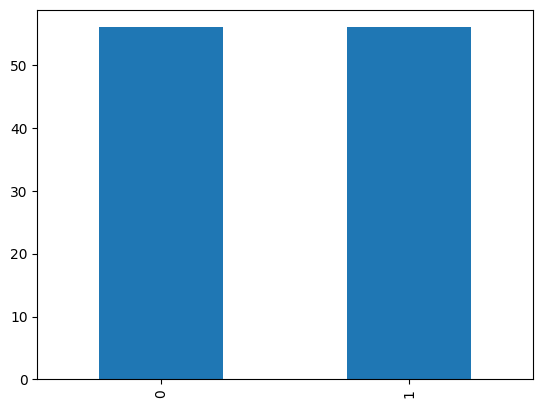

In [ ]:
val_df['label'].value_counts().plot.bar()

In [ ]:
val_df['label'] = val_df['label'].astype(str)

In [ ]:
conf_datagen = ImageDataGenerator(
    rescale = 1./255,
)

conf_generator = conf_datagen.flow_from_dataframe(
    val_df,
    "/train",
    x_col = 'images',
    y_col = 'label',
    target_size = (400,450),
    shuffle = False,
    class_mode = 'binary'
)


Found 112 validated image filenames belonging to 2 classes.


In [ ]:
y_predict = model_1.predict(conf_generator)

4/4 [==============================] - 20s 5s/step


In [ ]:
y_predict = np.where(y_predict > 0.5, 1, 0)

In [ ]:
p = conf_generator.classes
q = y_predict
p = np.array(p)
q = q.flatten()

[[43 13]
 [28 28]]


[Text(0, 0.5, 'Cat Flea'), Text(0, 1.5, 'Dog Flea')]

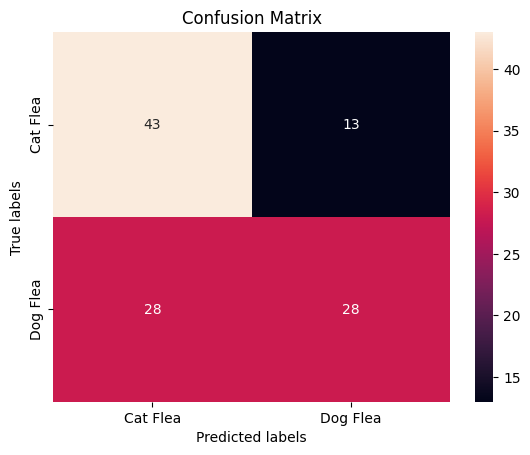

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cfm = confusion_matrix(p, q)
print(cfm)
ax= plt.subplot()
sns.heatmap(cfm, annot=True, ax = ax);
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Cat Flea', 'Dog Flea'])
ax.yaxis.set_ticklabels(['Cat Flea', 'Dog Flea'])

In [ ]:
print(classification_report(p,q))

              precision    recall  f1-score   support

           0       0.61      0.77      0.68        56
           1       0.68      0.50      0.58        56

    accuracy                           0.63       112
   macro avg       0.64      0.63      0.63       112
weighted avg       0.64      0.63      0.63       112

